In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
data = pd.read_csv("dataset.csv", index_col=0).drop('Unnamed: 0.1', axis=1)


In [43]:
data.shape

(1500, 3)

In [51]:
new_data = data.dropna()

In [53]:
new_data.reset_index(inplace = True)

In [54]:
new_data.head()

,index,ban,body,likes
0,0,1.0,"Я, конечно, может быть и надоел вам рекламой м...",3781
1,1,1.0,Когда Филипп Македонский (отец Александра) под...,686
2,2,1.0,"Несколько веков назад, Папа Римский объявил, ч...",699
3,3,1.0,Заходит Обама в бордель и видит супер красивую...,3846
4,5,1.0,"Очень толстый мужчина обратился в контору, кот...",1450


In [55]:
texts = new_data['body'].values
target = new_data['ban'].values

In [56]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

In [57]:
texts = texts.astype(np.str)

In [58]:
texts = [preprocess(x) for x in texts]

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [60]:
count_vec = CountVectorizer()
text_bow = count_vec.fit_transform(texts)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_bow, target, test_size=0.5, random_state=17)

In [62]:
text_bow[:50]

<50x53804 sparse matrix of type '<class 'numpy.int64'>'
	with 2200 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

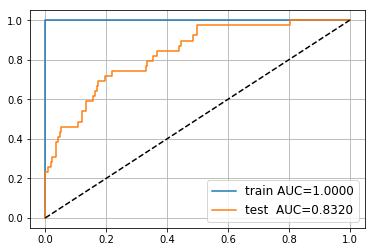

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, bow_model),
    ('test ', X_test, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [65]:
accuracy_score(y_test, bow_model.predict(X_test))

0.9350104821802935

In [66]:
count_vec = CountVectorizer()
text_bow = count_vec.fit_transform(texts)

In [67]:
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_bow)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, target, test_size=0.5, random_state=17)

In [69]:
tfidf_transform_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

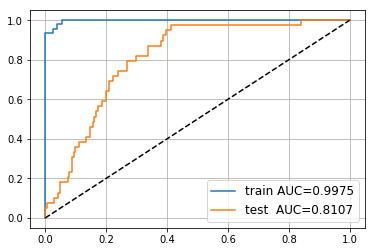

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tfidf_transform_model),
    ('test ', X_test, y_test, tfidf_transform_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [71]:
accuracy_score(y_test, tfidf_transform_model.predict(X_test))

0.9203354297693921

In [72]:
tfidf_vec= TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(texts)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, target, test_size=0.5, random_state=17)

In [74]:
tfidf_model = LogisticRegression(fit_intercept=False).fit(X_train, y_train)

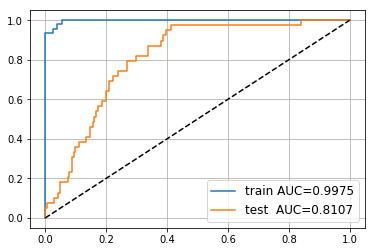

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tfidf_model),
    ('test ', X_test, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

In [76]:
accuracy_score(y_test, tfidf_model.predict(X_test))

0.9203354297693921

In [77]:
sent = ["Wikipedia was launched on January 15, 2001, by Jimmy Wales and Larry Sanger"]

In [78]:
sent = [preprocess(x) for x in sent]

In [79]:
sent_tfidf = tfidf_vec.transform(sent)

In [80]:
tfidf_model.predict(sent_tfidf)

array([0.])

In [81]:
tfidf_model.predict_proba(sent_tfidf)

array([[0.55749662, 0.44250338]])

In [82]:
import pickle

In [83]:
with open('model.pkl', 'wb') as f:
  pickle.dump(tfidf_model, f)

In [84]:
with open('model.pkl', 'rb') as f:
  model = pickle.load(f)

In [85]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)